# First question

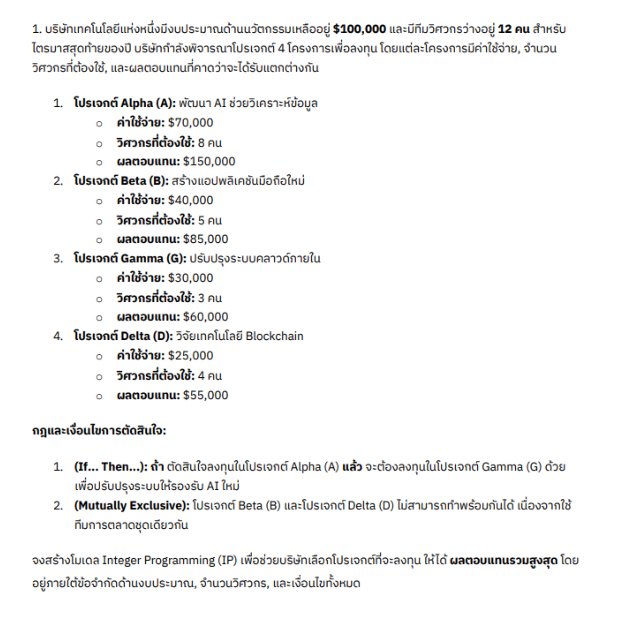

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('1.png')
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [1]:
# 1.
from scipy.optimize import milp, LinearConstraint, Bounds
import numpy as np

objective = np.array([-150000,-85000,-60000,-55000])
# A <= G
# B+D <= 1
# 70000A + 40000B + 30000G + 25000D <= 100000
# 8A + 5B + 3G + 4D <= 12
# A,B,G,D >= 0 and all are integer
A = np.array([
    [1,0,-1,0],
    [0,1,0,1],
    [70000,40000,30000,25000],
    [8,5,3,4]
])
lb = np.full(len(A), -np.inf)
ub = np.zeros(len(A))
ub[0] = 0
ub[1] = 1
ub[2] = 100000
ub[3] = 12
constraint = LinearConstraint(A,lb,ub)
lower_bound,upper_bound = np.zeros(len(objective)),np.ones(len(objective))
bounds = Bounds(lower_bound,upper_bound)
intergral = np.array([1,1,1,1])
result = milp(c=objective, constraints=constraint, bounds=bounds, integrality=intergral)
print(result)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -210000.0
              x: [ 1.000e+00 -0.000e+00  1.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: -210000.0
        mip_gap: 0.0


# Second Question

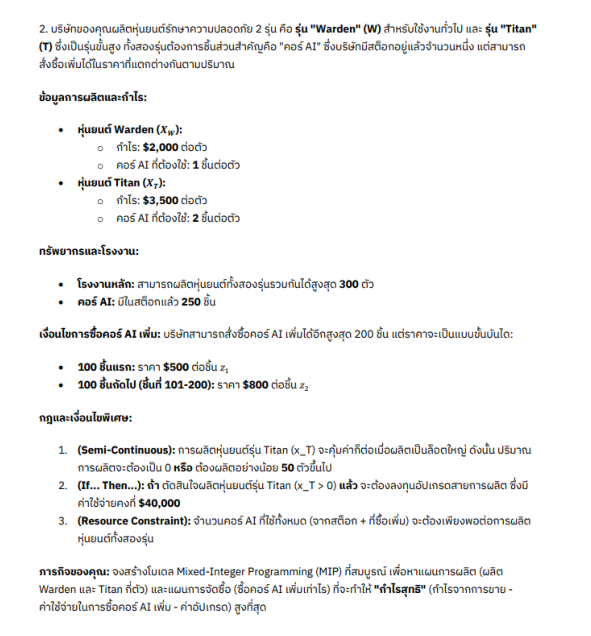

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('2.png')
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [2]:
from scipy.optimize import milp, LinearConstraint, Bounds
import numpy as np
'''
objective = max(2000a + 3500b - Buy(d) - 40000x)
Buy(d) = z1*Buy(b0) + z2*Buy(b1) + z3*Buy(b2)
       = 0 + z2*50000 + z3*130000
d = z1*0 + z2*100 + z3*200
z1 <= y1, z2 <= y1 + y2, z3 <= y2
y1+y2 = 1, z1+z2+z3 = 1
zi,a,b >= 0, yi = {0,1}, d<= 200, x= {0,1}
a + 2b <= 250 + d,
a + b <= 300

either or
f(x) <= 0 -> b <= 0 -> f(x) = b
g(x) <= 0 -> b >=50 -> 50-b <= 0 -> g(x) = 50-b
b <= M*e
50 - b <= M(1-e)
โดย e = {0,1}
หา M จาก การที่รวมกันไม่เกิน 300 ตัวงั้น b <= 300e กับ b >= 0 ทำให้ 50 - b >= 50 ทำให้ max(M) = max(300,50) = 300


if-then
if f(x) > 0 , then g(x) >= 0
b > 0 then, x = 1 -> x-1 = 0
f(x) = b
g(x) = x-1
จะได้
-(x-1) <= Mt
b <= M(1-t)
หา M จาก xเป็นได้แค่ 0 กับ 1 ทำให้ 1-x <= 1 -> M = 1, จาก b <= 300 ทำให้ b <= 300 -> M = 300 , max(M) = max(300,1) = 300

'''


'\nobjective = max(2000a + 3500b - Buy(d) - 40000x)\nBuy(d) = z1*Buy(b0) + z2*Buy(b1) + z3*Buy(b2)\n       = 0 + z2*50000 + z3*130000\nd = z1*0 + z2*100 + z3*200\nz1 <= y1, z2 <= y1 + y2, z3 <= y2\ny1+y2 = 1, z1+z2+z3 = 1\nzi,a,b >= 0, yi = {0,1}, d<= 200, x= {0,1}\na + 2b <= 250 + d,\na + b <= 300\n\neither or \nf(x) <= 0 -> b <= 0 -> f(x) = b\ng(x) <= 0 -> b >=50 -> 50-b <= 0 -> g(x) = 50-b \nb <= M*e \n50 - b <= M(1-e)\nโดย e = {0,1}\nหา M จาก การที่รวมกันไม่เกิน 300 ตัวงั้น b <= 300e กับ b >= 0 ทำให้ 50 - b >= 50 ทำให้ max(M) = max(300,50) = 300\n\n\nif-then\nif f(x) > 0 , then g(x) >= 0\nb > 0 then, x = 1 -> x-1 = 0\nf(x) = b\ng(x) = x-1\nจะได้\n-(x-1) <= Mt\nb <= M(1-t)\nหา M จาก xเป็นได้แค่ 0 กับ 1 ทำให้ 1-x <= 1 -> M = 1, จาก b <= 300 ทำให้ b <= 300 -> M = 300 , max(M) = max(300,1) = 300\n\n'

# Thrid Question

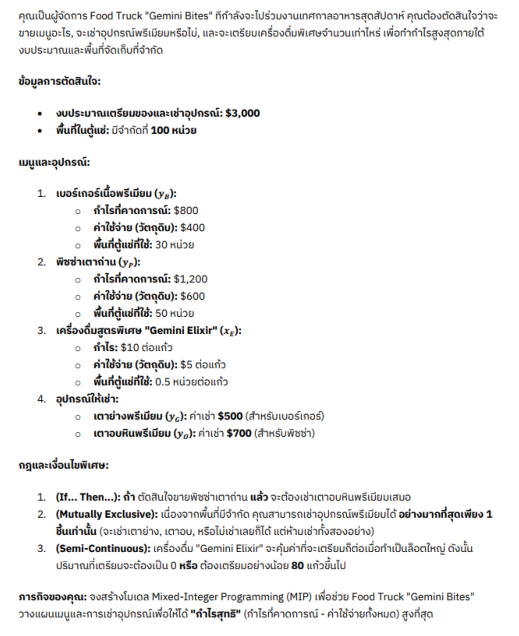

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('3.png')
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
'''
objective = max(400a + 600b + 5c - 500y1 - 700y2)
โดย a,b,y1,y2 = {0,1} และ c = 0 หรือ c>= 80

if then f(x) > 0 then g(x) >= 0
b = 1 then y2 = 1
f(x) = b - 1, g(x) = y2 - 1
constraint เป็น
-(y2 - 1) <= M(e) -> 1 - y2 <= M*(e)
b-1 <= M(1-e)
โดย e = {0,1}
และหา M จาก y2 = 0 หรือ1 ดังนั้น M = 1 และ b เป็นได้แค่ 0 หรือ1 ดงนั้น b-1 <= 0 จะได้ M = 0, M = max(M) จะได้ M = 1
เขียนได้เป็น
1-y2 <= e
b-1 <= 1-e

either or
f(x) <= 0 or g(x) <= 0
c <= 0 or c >= 80 -> 80 - c <= 0
จะไดเ f(x) = c และ 80 -c = g(x)
constraint เป็น
c<= M*t
80 - c <= M(1-t)
หา M จาก การที่มีเงินเริ่ม 3000 ดังนั้นซื้อวัตถุทำได้ไม่เกิน 600 แก้วจะได้ M = 600, และ c >= 0จะได้ M = 80 จะได้ M = max(M) = 600
c<= 600t
80-c <= 600(1-t)

y1 + y2 <= 1

400a + 600b + 5c + 500y1  + 700y2 <= 3000
30a + 50b + 0.5c <= 100
'''

# Fourth Question

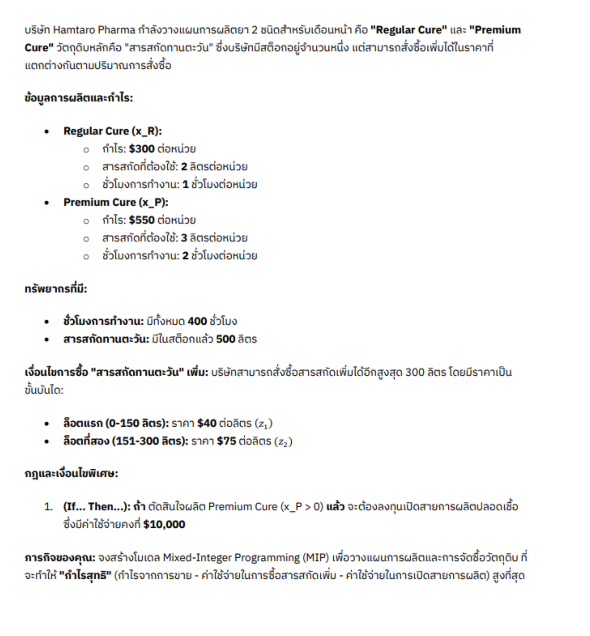

In [9]:
from PIL import Image
image = Image.open('4.png')
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [14]:
'''
objective = max(300a + 550b -Buy(c) - 10000d)
โดย a,b,c >= 0 และเป็น Integer , d = {0,1}
normal constraint:
  a + 2b <= 400
  2a + 3b <= 500 + c
piece wise constraint:
  Buy(c) = z1*40*0 + z2*6000 + z3*17250
  c = z1*0 + z2*150 + z3*300
  z1 <= y1 , z2 <= y1 + y2, z3 <= y2
  y1 + y2 = 1, yi = {0,1}
  z1+z2+z3 = 1, zi >= 0
  c <= 300
if then constraint:
  if f(x) > 0 thne g(x) >= 0
  if b > 0 then d = 1 -> d-1 = 0
  f(x) = b, g(x) = d-1
  1-d <= My
  b <= M(1-y)
  หา M จาก d เป็นได้แค่ 0 หรือ 1ทำให้ M = 1 และ b <= 200 เพราะชั่วโมงต่อหน่วยเท่ากับ 2 และมีแค่ 400 ชั่วโมงเลยทำได้มากสุดแค่ 200 หน่วยจะได้
  M = max(M) = max(200,1) = 200
  1-d <= 200y
  b <= 200(1-y)
'''

'\nobjective = max(300a + 550b -Buy(c) - 10000d)\nโดย a,b,c >= 0 และเป็น Integer , d = {0,1}\nnormal constraint:\n  a + 2b <= 400\n  2a + 3b <= 500 + c\npiece wise constraint:\n  Buy(c) = z1*40*0 + z2*6000 + z3*17250\n  c = z1*0 + z2*150 + z3*300\n  z1 <= y1 , z2 <= y1 + y2, z3 <= y2\n  y1 + y2 = 1, yi = {0,1}\n  z1+z2+z3 = 1, zi >= 0\n  c <= 300\nif then constraint:\n  if f(x) > 0 thne g(x) >= 0\n  if b > 0 then d = 1 -> d-1 = 0\n  f(x) = b, g(x) = d-1\n  1-d <= My\n  b <= M(1-y)\n  หา M จาก d เป็นได้แค่ 0 หรือ 1ทำให้ M = 1 และ b <= 200 เพราะชั่วโมงต่อหน่วยเท่ากับ 2 และมีแค่ 400 ชั่วโมงเลยทำได้มากสุดแค่ 200 หน่วยจะได้\n  M = max(M) = max(200,1) = 200\n  1-d <= 200y\n  b <= 200(1-y)\n'

# Fifth Question

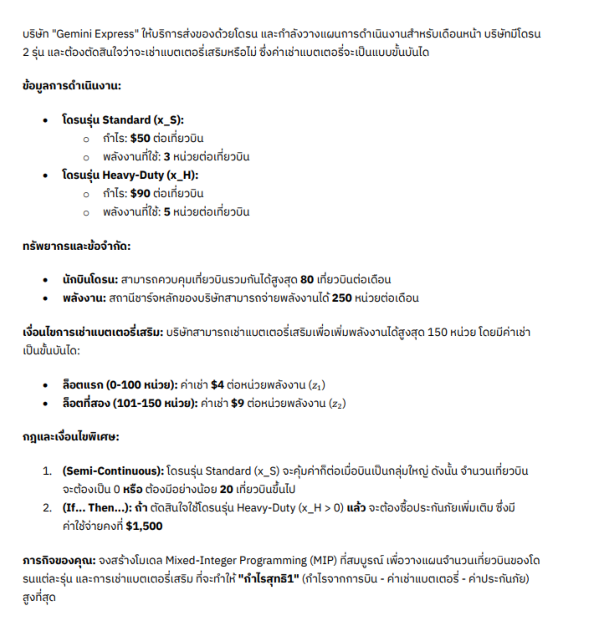

In [13]:
from PIL import Image
image = Image.open('5.png')
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
'''
objective = max(50a + 90b - Buy(c) - 1500d)
a,b,c >= 0, และ เป็น Integer, d = {0,1}
normal constraint:
  a+b <= 80
  3a + 5b <= 250 + c
piece wise constraint:
  Buy(c) = 0 + z2*400 + z3*850
  c = z2*100 + z3*150
  z1 <= y1, z2 <= y1 + y2, z3 <= y2
  y1+y2 = 1, z1+z2+z3 = 1, yi = {0,1}, z>=0
  c <=150
Either or constraint:
  f(x) <= 0 or g(x) <=0
  a <= 0 or a >= 20
  f(x) = a, g(x) = 20-a
  a <= M(e)
  20-a <= M(1-e)
  e = {0,1}
  หา M จาก a ไม่เกิน 80 เที่ยวบิน M = 80 และ a >= 0 ทำให้ M =20 จะได้ M = max(M) = max(80,20) = 80
  a <= 80e
  20-a <= 80(1-e)
if then constraint:
  if f(x) > 0 then g(x) >= 0
  if b >0 then d = 1
  f(x) = b, g(x) = d-1
  1-d <= M*t
  b <= M(1-t)
  t = {0,1}
  หา M จาก d ได้แค่ 0,1 จะได้ M = 1 และ b <= 80 จะได้ M = 80 จะได้ M = max(M) = max(80,1) = 80
  1-d <=80t
  b <= 80(1-t)
'''

'\nobjective = max(50a + 90b - Buy(c) - 1500d)\na,b,c >= 0, และ เป็น Integer, d = {0,1}\nnormal constraint:\n  a+b <= 80\n  3a + 5b <= 250 + c\npiece wise constraint:\n  Buy(c) = 0 + z2*400 + z3*850\n  c = z2*100 + z3*150\n  z1 <= y1, z2 <= y1 + y2, z3 <= y2\n  y1+y2 = 1, z1+z2+z3 = 1, yi = {0,1}, z>=0\n  c <=150\nEither or constraint:\n'

# Sixth Question

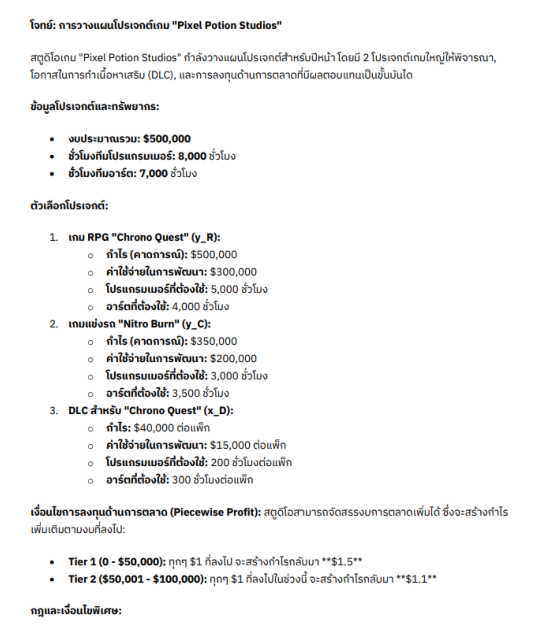

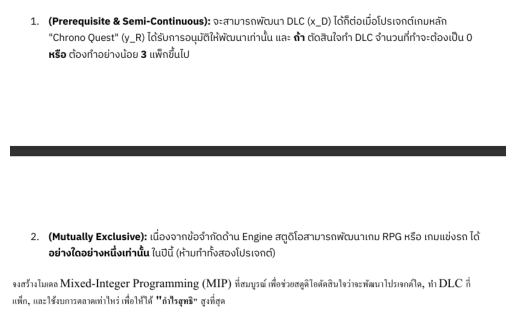

In [17]:
from PIL import Image
image_1 = Image.open('6-1.png')
image_2 = Image.open('6-2.png')
plt.figure(figsize=(10,8))
plt.imshow(image_1)
plt.axis('off')
plt.show()

plt.imshow(image_2)
plt.axis('off')
plt.show()


In [18]:
'''
objective = max(500000a + 350000b + 40000c - d + result(d))
a,b = {0,1} c,d >= 0 และ c,d เป็น Integer
normal constraint:
  300000a + 200000b + 15000c + d <= 500000
  5000a + 3000b + 200c <= 8000
  4000a + 3500b + 300c <= 7000

piece wise of result(d):
  result(d) = 0*e1 + e2*75000 + e3*130000
  d = z1*0 + z2*50000 + z3*100000
  z1 <= y1, z2 <= y1 + y2, z3 <= y2
  zi >= 0, yi = {0,1}
  z1+z2+z3 = 1, y1 + y2 = 1, d <= 100000
Exclusive:
  a+b <= 1
if then constraint:
  f(x) > 0 then g(x) >= 0
  if c > 0 then a = 1
  f(x) = c , g(x) = a-1
  1-a <= M*e
  c <= M(1-e)
  หา M จาก a เป้นได้แค่ 0,1 ทำให้ M= 1 และ c ไม่เกิน 14 pack เพราะ( 500000-300000)/15000 M = 14
  จะได้ M = max(M) = max(1,14) = 14
  1-a <= 14e
  c <= 14(1-e)
either or constraint:
  f(x) <= 0 or g(x) <= 0
  c <= 0 or c >= 3
  f(x) = c, g(x) = 3-c
  c <= M(t)
  3-c <= M(1-t)
  หา M จาก c <= 14 ทำให้ M = 14 และ c>=0 ทำให้ M = 3จะได้ M = max(3,14) = 14
  c <= 14t
  3-c <= 14(1-t)
'''

'\nobjective = max(500000a + 350000b + 40000c - d + result(d))\na,b = {0,1} c,d >= 0 และ c,d เป็น Integer\nnormal constraint:\n  300000a + 200000b + 15000c + d <= 500000\n  5000a + 3000b + 200c <= 8000\n  4000a + 3500b + 300c <= 7000 \n\npiece wise of result(d):\n  result(d) = 0*e1 + e2*75000 + e3*130000\n  d = z1*0 + z2*50000 + z3*100000\n  z1 <= y1, z2 <= y1 + y2, z3 <= y2\n  zi >= 0, yi = {0,1}\n  z1+z2+z3 = 1, y1 + y2 = 1, d <= 100000\nExclusive:\n  a+b <= 1\nif then constraint:\n  f(x) > 0 then g(x) >= 0\n  if c > 0 then a = 1\n  f(x) = c , g(x) = a-1\n  1-a <= M*e\n  c <= M(1-e)\n  หา M จาก a เป้นได้แค่ 0,1 ทำให้ M= 1 และ c ไม่เกิน 14 pack เพราะ( 500000-300000)/15000 M = 14 \n  จะได้ M = max(M) = max(1,14) = 14\n  1-a <= 14e\n  c <= 14(1-e)\neither or constraint:\n  f(x) <= 0 or g(x) <= 0\n  c <= 0 or c >= 3\n  f(x) = c, g(x) = 3-c\n  c <= M(t)\n  3-c <= M(1-t)\n  หา M จาก c <= 14 ทำให้ M = 14 และ c>=0 ทำให้ M = 3จะได้ M = max(3,14) = 14\n  c <= 14t\n  3-c <= 14(1-t)\n'